<a href="https://colab.research.google.com/github/pierre-brendan/PelotonIQ/blob/master/rider_cluserting/kmeans_rider_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rider Clustering

In [0]:
## install the packages I need for this
# !pip install sklearn

In [0]:
# Mount drive to get cyclist data
from google.colab import drive
drive.mount('/content/drive')

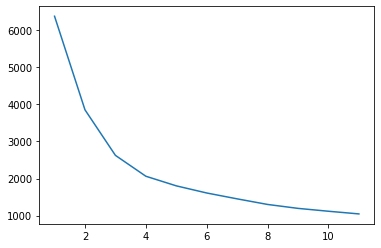

In [0]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# load the data
cycling_data = pd.read_csv('/content/drive/My Drive/cycling_data/rider_data.csv')
cycling_data = cycling_data[cycling_data['Rider'] != 'Bjorg Lambrecht ']
cycling_data = cycling_data[cycling_data['Rider'] != 'Robbert de Greef ']

# make a df without cyclist name in it for clustering
cycling_data.head()
d = cycling_data.drop(['Rider', 'Team', 'crawl_date'], axis=1)

# let's normalize the data
d['GC'] = preprocessing.scale(d['GC'])
d['Sprint'] = preprocessing.scale(d['Sprint'])
d['TT'] = preprocessing.scale(d['TT'])
d['Climber'] = preprocessing.scale(d['Climber'])
d['Classic'] = preprocessing.scale(d['Classic'])
d['Age'] = preprocessing.scale(d['Age'])

# let's go with 8 clusters to start
m = KMeans(8)
m.fit(d)

# Add to our data frame
d['Cluster'] = m.labels_

# join back to original data set on index
cycling_data2 = pd.merge(cycling_data, d, left_index=True, right_index=True)

# Review the data
#cycling_data2.head()

# Total errors and # of clusters
dist_points_from_cluster_center = []
K = range(1,12)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(d)
  dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)
# Elbow is at 2-4ish, might test 8 though
# 8 seems solid when I review the results


In [0]:
# Let's roll up the avg of of each attribute to see what the clusters made
#cycling_data2.head()
z = cycling_data2.groupby(['Cluster']).mean()
cycling_data2.to_csv('test_data.csv', index=False)

# Conclusions

Generally results are solid given the inputs. There is one cluster that has a ton of meh riders in it but also serious up and coming riders. I think adding stage wins, classic wins and GC wins will make this clustering project much more accurate.

Once I have those fields, I will revist this project and update it.

# Updated Clustering Model, now includes Monuments and GC winners

In [0]:
# Mount drive to get cyclist data
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#-*- coding: UTF-8 -*-

# load modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# load the rider data
cycling_data = pd.read_csv('/content/drive/My Drive/cycling_data/rider_data.csv')
cycling_data = cycling_data[cycling_data['Rider'] != 'Bjorg Lambrecht ']
cycling_data = cycling_data[cycling_data['Rider'] != 'Robbert de Greef ']

# Load the GC data
gc_winners = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/gc_winners_consolidated.csv')
gc_winners.rename(columns = {'Cyclist':'Rider'}, inplace = True)

# Merge the GC winners to the rider data set
cycling_data = pd.merge(cycling_data, gc_winners, how='left', on='Rider')

# Load in the Monuments data
san_remo = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/san_remo.csv')
san_remo = san_remo['san_remo_win'].groupby(san_remo['Rider']).sum()
roubaix = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/roubaix.csv')
roubaix = roubaix['roubaix_win'].groupby(roubaix['Rider']).sum()
flanders = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/flanders.csv')
flanders = flanders['flanders_win'].groupby(flanders['Rider']).sum()
lombardia = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/lombardia.csv')
lombardia = lombardia['lombardia_win'].groupby(lombardia['Rider']).sum()
liege = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/liege.csv')
liege = liege['lbl_win'].groupby(liege['Rider']).sum()

# Merge the Monuments winners to the rider data set
cycling_data = pd.merge(cycling_data, san_remo, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, flanders, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, liege, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, lombardia, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, roubaix, how='left', on='Rider')

# Replace NaN with 0's
cycling_data.fillna(0, inplace=True)

# Drop country variable
cycling_data = cycling_data.drop(['Country', 'crawl_date'], axis = 1)

#cycling_data.head()


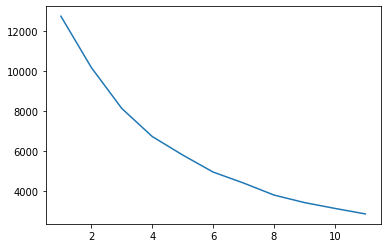

In [0]:
# make a df without cyclist name in it for clustering
d = cycling_data.drop(['Rider', 'Team'], axis=1)

# let's normalize the data
d['GC'] = preprocessing.scale(d['GC'])
d['Sprint'] = preprocessing.scale(d['Sprint'])
d['TT'] = preprocessing.scale(d['TT'])
d['Climber'] = preprocessing.scale(d['Climber'])
d['Classic'] = preprocessing.scale(d['Classic'])
d['Age'] = preprocessing.scale(d['Age'])
d['Giro'] = preprocessing.scale(d['Giro'])
d['Vuelta'] = preprocessing.scale(d['Vuelta'])
d['Tour'] = preprocessing.scale(d['Tour'])
d['Total'] = preprocessing.scale(d['Total'])
d['san_remo_win'] = preprocessing.scale(d['san_remo_win'])
d['lombardia_win'] = preprocessing.scale(d['lombardia_win'])
d['flanders_win'] = preprocessing.scale(d['flanders_win'])
d['lbl_win'] = preprocessing.scale(d['lbl_win'])
d['roubaix_win'] = preprocessing.scale(d['roubaix_win'])

# let's go with 6 clusters to start
# ultimately decided on 7 but 8 is also very good
m = KMeans(7)
m.fit(d)

# Add to our data frame
d['Cluster'] = m.labels_

# join back to original data set on index
cycling_data2 = pd.merge(cycling_data, d, left_index=True, right_index=True)

# Review the data
#cycling_data2.head()

# Total errors and # of clusters
dist_points_from_cluster_center = []
K = range(1,12)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(d)
  dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)
# Elbow looks more like at 4 or 6 now


In [0]:
# save the output of the data
cycling_data2.to_csv('cluster_2.csv', index=False)


# Conclusions part deux

Essentially 7-8 clusters are best. There is still one large cluster (the Peloton) that has a few up and coming super stars in it. Ideally, I'd love to split them out. 

Based on what I've seen in the data, once you've been a professional for a while it is much easier to cluster riders.

The clusters are generally:


1.  Cyclists with a fair amount of points but never won a Grand Tour or Monument. (Getting overall wins will help breakout this cluster)
2.  The Peloton mixed with some very good young riders.
3.  Vincenzo Nibali & Chris Froome
4.  Riders who have a good amount of sprint points and won Monuments (Sagan, GVA, Gilbert)
5.  GC winners and GC favorites
6.  Alejandro Valverde
7.  Really good cyclists that have won San Remo (Alaphilippe, Kristoff, Demare, Kwiatkowski, Degenkolb

Generally, the clusters are fairly solid. I think if I had overall wins it would help with the breakouts as well as if I had riders who won other categories in Grand Tours. Clusters 4 & 7 are very similar in some ways.


# Update: Added in more classics and Multi-Stage Grand Tour Warm-ups

In [0]:
# Mount drive to get cyclist data
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#-*- coding: UTF-8 -*-
# load modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# load the rider data
cycling_data = pd.read_csv('/content/drive/My Drive/cycling_data/rider_data.csv')
cycling_data = cycling_data[cycling_data['Rider'] != 'Bjorg Lambrecht ']
cycling_data = cycling_data[cycling_data['Rider'] != 'Robbert de Greef ']

# Load the GC data
gc_winners = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/gc_winners_consolidated.csv')
gc_winners.rename(columns = {'Cyclist':'Rider'}, inplace = True)

# Merge the GC winners to the rider data set
cycling_data = pd.merge(cycling_data, gc_winners, how='left', on='Rider')

# Load in the Monuments data
san_remo = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/san_remo.csv')
san_remo = san_remo['san_remo_win'].groupby(san_remo['Rider']).sum()
roubaix = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/roubaix.csv')
roubaix = roubaix['roubaix_win'].groupby(roubaix['Rider']).sum()
flanders = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/flanders.csv')
flanders = flanders['flanders_win'].groupby(flanders['Rider']).sum()
lombardia = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/lombardia.csv')
lombardia = lombardia['lombardia_win'].groupby(lombardia['Rider']).sum()
liege = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/liege.csv')
liege = liege['lbl_win'].groupby(liege['Rider']).sum()
strade = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/strade.csv')
strade['strade_win'] = 1
strade = strade['strade_win'].groupby(strade['Rider']).sum()
suisse = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/suisse.csv')
suisse['suisse_win'] = 1
suisse = suisse['suisse_win'].groupby(suisse['Rider']).sum()
romandie = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/romandie.csv')
romandie['romandie_win'] = 1
romandie = romandie['romandie_win'].groupby(romandie['Rider']).sum()
paris_nice = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/paris_nice.csv')
paris_nice['paris_nice_win'] = 1
paris_nice = paris_nice['paris_nice_win'].groupby(paris_nice['Rider']).sum()
gent = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/gent.csv')
gent['gent_win'] = 1
gent = gent['gent_win'].groupby(gent['Rider']).sum()
fleche = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/fleche.csv')
fleche['fleche_win'] = 1
fleche = fleche['fleche_win'].groupby(fleche['Rider']).sum()
e3_binckbank = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/e3_binckbank.csv')
e3_binckbank['e3_binckbank_win'] = 1
e3_binckbank = e3_binckbank['e3_binckbank_win'].groupby(e3_binckbank['Rider']).sum()
dauphine = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/dauphine.csv')
dauphine['dauphine_win'] = 1
dauphine = dauphine['dauphine_win'].groupby(dauphine['Rider']).sum()
amstel = pd.read_csv('/content/drive/My Drive/cycling_data/Historical_GC_Classics_Results/amstel.csv')
amstel['amstel_win'] = 1
amstel = amstel['amstel_win'].groupby(amstel['Rider']).sum()


# Merge the Monuments winners to the rider data set
cycling_data = pd.merge(cycling_data, san_remo, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, flanders, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, liege, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, lombardia, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, roubaix, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, strade, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, suisse, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, fleche, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, gent, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, paris_nice, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, e3_binckbank, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, amstel, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, dauphine, how='left', on='Rider')
cycling_data = pd.merge(cycling_data, romandie, how='left', on='Rider')

# Replace NaN with 0's
cycling_data.fillna(0, inplace=True)

# Drop country variable
cycling_data = cycling_data.drop(['Country', 'crawl_date'], axis = 1)


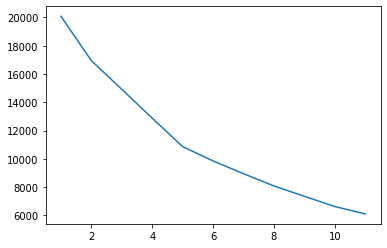

In [18]:

# This would be the best approach to removing special characters
#dictionary = {'ž':'z', 'č':'c', 'ü':'u', 'á':'a', 'é':'e', 'ö':'o', 'ó':'o', 'ç':'c',
#              'ń':'ń', 'í':'i', 'è':'e'}
#cycling_data.replace(dictionary, regex=True, inplace=True)

# make a df without cyclist name in it for clustering
d = cycling_data.drop(['Rider', 'Team'], axis=1)

# let's normalize the data
d['GC'] = preprocessing.scale(d['GC'])
d['Sprint'] = preprocessing.scale(d['Sprint'])
d['TT'] = preprocessing.scale(d['TT'])
d['Climber'] = preprocessing.scale(d['Climber'])
d['Classic'] = preprocessing.scale(d['Classic'])
d['Age'] = preprocessing.scale(d['Age'])
d['Giro'] = preprocessing.scale(d['Giro'])
d['Vuelta'] = preprocessing.scale(d['Vuelta'])
d['Tour'] = preprocessing.scale(d['Tour'])
d['Total'] = preprocessing.scale(d['Total'])
d['san_remo_win'] = preprocessing.scale(d['san_remo_win'])
d['lombardia_win'] = preprocessing.scale(d['lombardia_win'])
d['flanders_win'] = preprocessing.scale(d['flanders_win'])
d['lbl_win'] = preprocessing.scale(d['lbl_win'])
d['roubaix_win'] = preprocessing.scale(d['roubaix_win'])
d['strade_win'] = preprocessing.scale(d['strade_win'])
d['suisse_win'] = preprocessing.scale(d['suisse_win'])
d['fleche_win'] = preprocessing.scale(d['fleche_win'])
d['gent_win'] = preprocessing.scale(d['gent_win'])
d['paris_nice_win'] = preprocessing.scale(d['paris_nice_win'])
d['e3_binckbank_win'] = preprocessing.scale(d['e3_binckbank_win'])
d['amstel_win'] = preprocessing.scale(d['amstel_win'])
d['dauphine_win'] = preprocessing.scale(d['dauphine_win'])
d['romandie_win'] = preprocessing.scale(d['romandie_win'])

# let's go with 6 clusters to start
# ultimately decided on 8
m = KMeans(8)
m.fit(d)

# Add to our data frame
d['Cluster'] = m.labels_

# join back to original data set on index
cycling_data2 = pd.merge(cycling_data, d, left_index=True, right_index=True)

# Review the data
#cycling_data2.head()

# Total errors and # of clusters
dist_points_from_cluster_center = []
K = range(1,12)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(d)
  dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)
# Elbow looks more like at 5

In [0]:
# save the output of the data
cycling_data2.to_csv('cluster_2.csv', index=False)